In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [2]:
df = pd.read_csv('c:/reposit/data/corazzon/상가업소정보_201912_01.csv', sep='|')
df.shape

(573680, 39)

In [3]:
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [5]:
df.isnull().sum().to_frame('null_count')

,null_count
상가업소번호,0
상호명,1
지점명,497006
상권업종대분류코드,0
상권업종대분류명,0
상권업종중분류코드,0
상권업종중분류명,0
상권업종소분류코드,0
상권업종소분류명,0
표준산업분류코드,34390


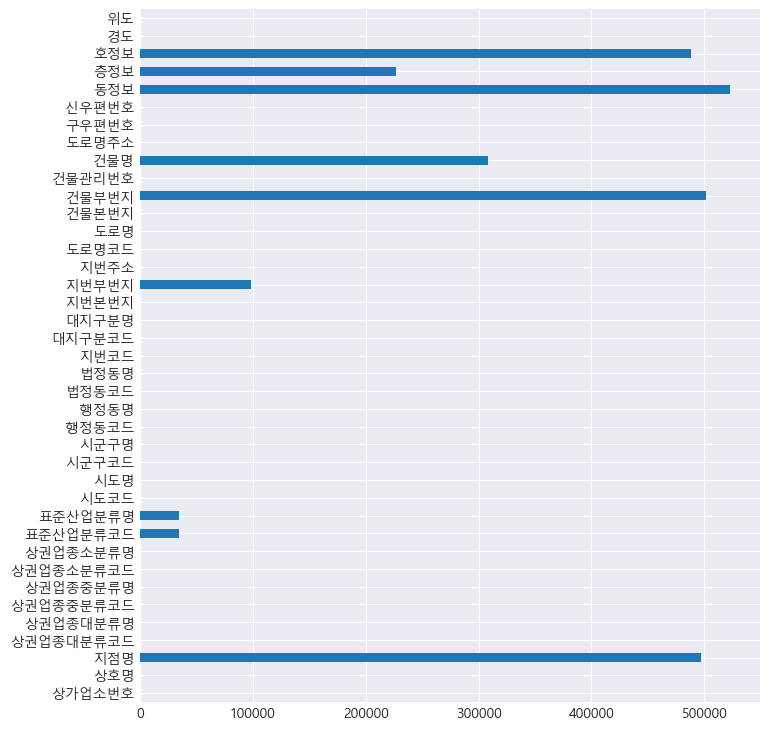

In [6]:
plt.figure(figsize=(8, 9))
df.isnull().sum().plot(kind='barh')
plt.show()

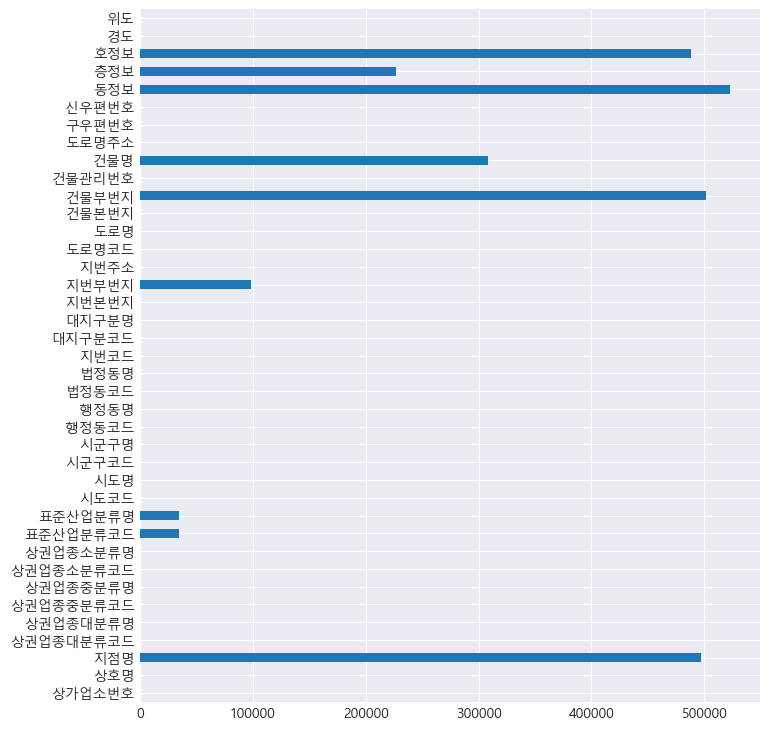

In [7]:
df.isnull().sum().plot.barh(figsize=(8, 9))
plt.show()

### 사용하지 않는 컬럼 제거하기

In [8]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
columns =['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']

df = df[columns].copy()
df.shape

(573680, 11)

## 색인으로 서브셋 가져오기

### 서울만 따로 보기

In [10]:
df['시도명'].unique()

array(['서울특별시', '부산광역시'], dtype=object)

In [11]:
df_seoul = df[df['시도명']=='서울특별시'].copy()
df_seoul.shape

(407376, 11)

### 일부 텍스트가 들어가는 데이터만 가져오기

In [12]:
df_seoul['상호명'].nunique()

278706

In [13]:
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [18]:
df_seoul[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
1675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피
2957,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야커피
8534,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,중계1동,중계동,서울특별시 노원구 노원로22길 34,127.072754,37.646364,이디야커피
13913,이디아,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,상암동,상암동,서울특별시 마포구 월드컵북로 375,126.890828,37.577397,이디아
14605,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호2.3가동,금호동3가,서울특별시 성동구 장터길 17-1,127.017791,37.548427,이디야커피
...,...,...,...,...,...,...,...,...,...,...,...,...
557161,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,은평구,불광1동,불광동,서울특별시 은평구 불광로 59,126.931719,37.612329,이디야커피
557163,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,광진구,자양3동,자양동,서울특별시 광진구 능동로 90,127.070902,37.538350,이디야커피
557498,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,가양1동,마곡동,서울특별시 강서구 공항대로 247,126.835118,37.559191,이디야커피
565196,이디아스포츠,소매,운동/경기용품소매,운동/경기용품,서울특별시,금천구,가산동,가산동,서울특별시 금천구 디지털로 121,126.880083,37.476127,이디아스포츠


In [20]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'), '상호명_소문자'].shape

(543,)

In [21]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'), '상호명_소문자'].shape

(506,)

In [24]:
df_cafe = df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [26]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '스타벅스'
df_cafe.loc[~df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'
df_cafe[['상호명_소문자', '브랜드명']].head()

# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만듭니다.
# df_cafe["브랜드명"].fillna("이디야")

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [27]:
df_cafe[['상호명_소문자', '브랜드명']].tail()

,상호명_소문자,브랜드명
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


## 시각화

### 분류별 countplot 그리기

In [32]:
df_cafe['상권업종중분류명'].value_counts().to_frame()

,상권업종중분류명
커피점/카페,1036
학원-어학,3
광고/인쇄,2
주유소/충전소,1
유흥주점,1
분양,1
주택수리,1
기타판매업,1
종합소매점,1
패스트푸드,1


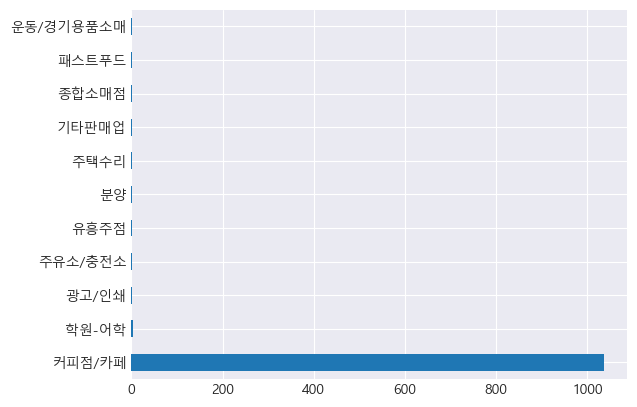

In [29]:
df_cafe['상권업종중분류명'].value_counts().plot.barh()
plt.show()

In [33]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe['상권업종중분류명']=='커피점/카페'].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

In [34]:
df_cafe['브랜드명'].value_counts().to_frame()

,브랜드명
이디야,532
스타벅스,504


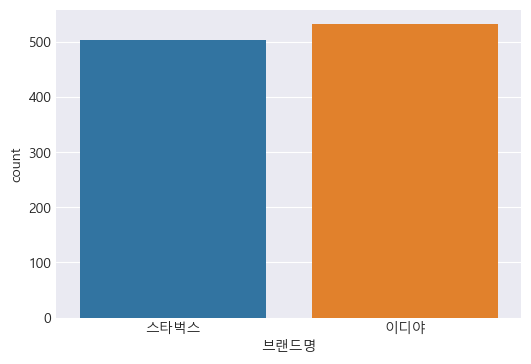

In [37]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
sns.countplot(data=df_cafe, x='브랜드명')
plt.show()